In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/book_sales.csv", index_col='Date', parse_dates=['Date'],).drop('Paperback', axis=1)

In [3]:
df0 = pd.read_csv("data/book_sales.csv")

In [4]:
df0.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [5]:
import numpy as np

In [6]:
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11,4),
    titlesize=14,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=12,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

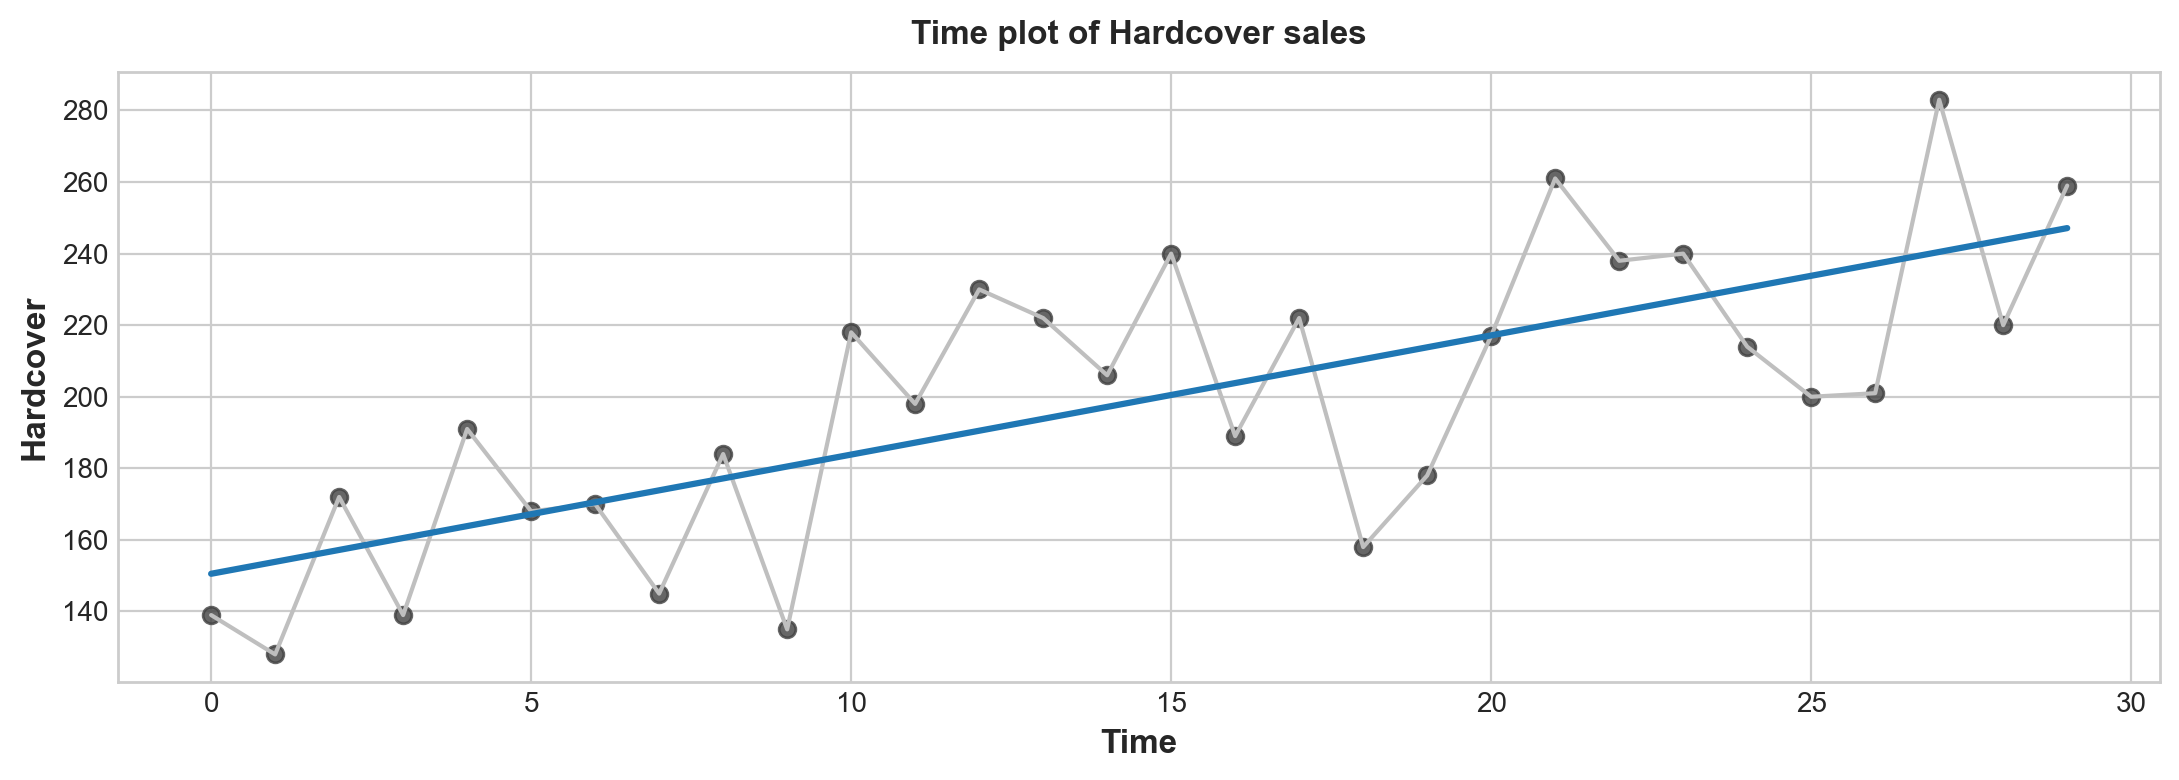

In [9]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of Hardcover sales');

In [10]:
df['Lag_1']=df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


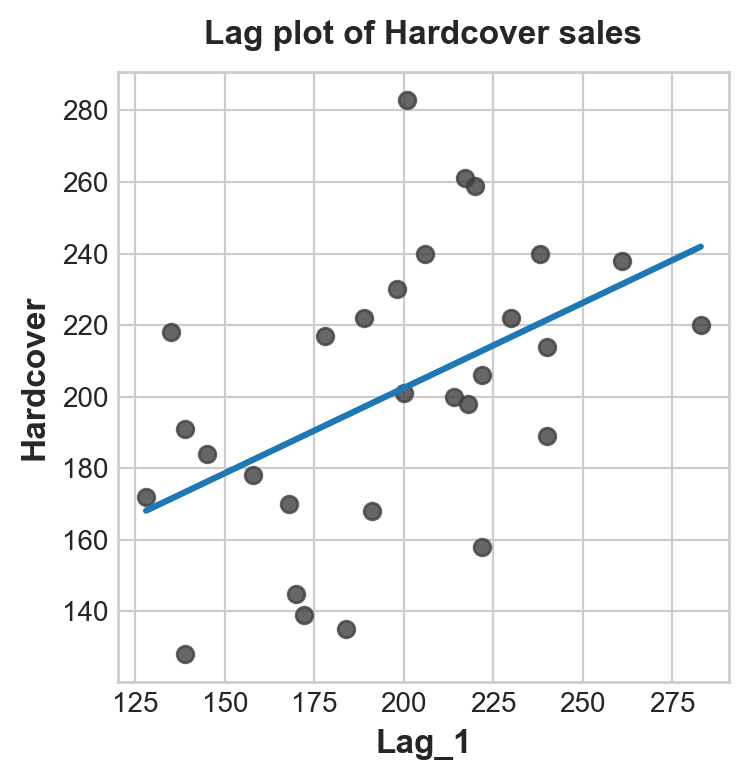

In [11]:
fig, ax=plt.subplots()
ax=sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag plot of Hardcover sales');

In [12]:
from pathlib import Path

In [13]:
from warnings import simplefilter

In [14]:
simplefilter("ignore")

plt.rc("figure", autolayout=True, figsize=(11, 4))

In [15]:
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=12,
    titlepad=10,
)
plot_params =dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format='retina'

In [16]:
tunnel=pd.read_csv("data/tunnel.csv", parse_dates=["Day"])

In [17]:
tunnel = tunnel.set_index("Day")
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [18]:
dft=tunnel.copy()
dft['Time']=np.arange(len(tunnel.index))
dft.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X=dft.loc[:, ['Time']]
y=dft.loc[:, 'NumVehicles']

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

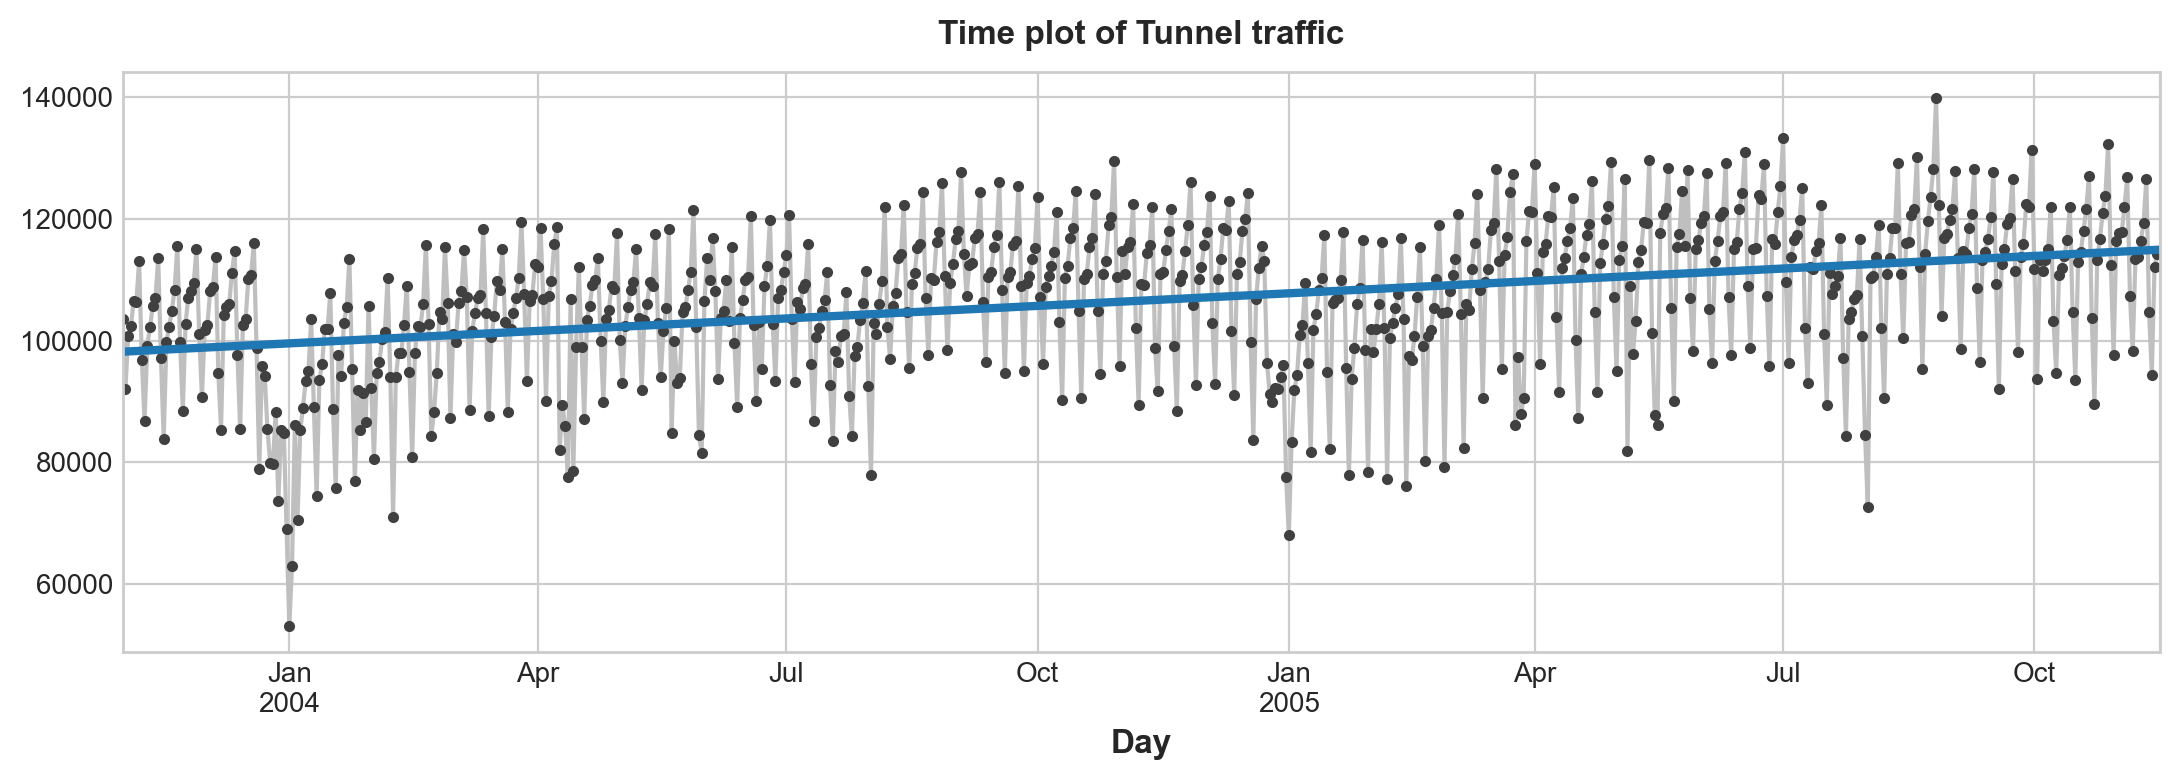

In [21]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time plot of Tunnel traffic');

In [22]:
dft['Lag_1'] = dft['NumVehicles'].shift(1)
dft.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [23]:
X=dft.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y=dft.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')
model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

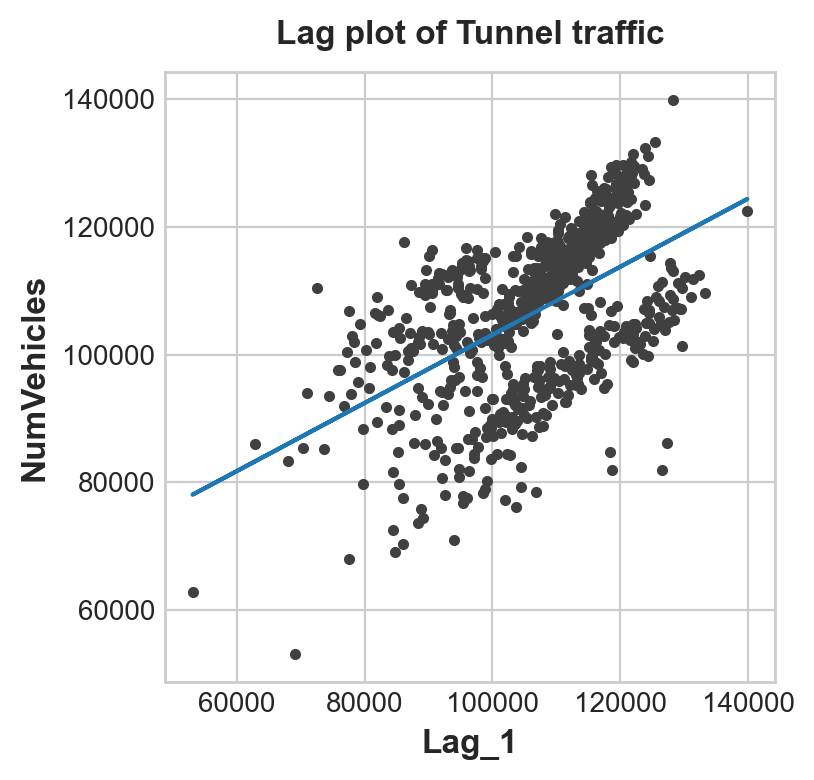

In [24]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag plot of Tunnel traffic');

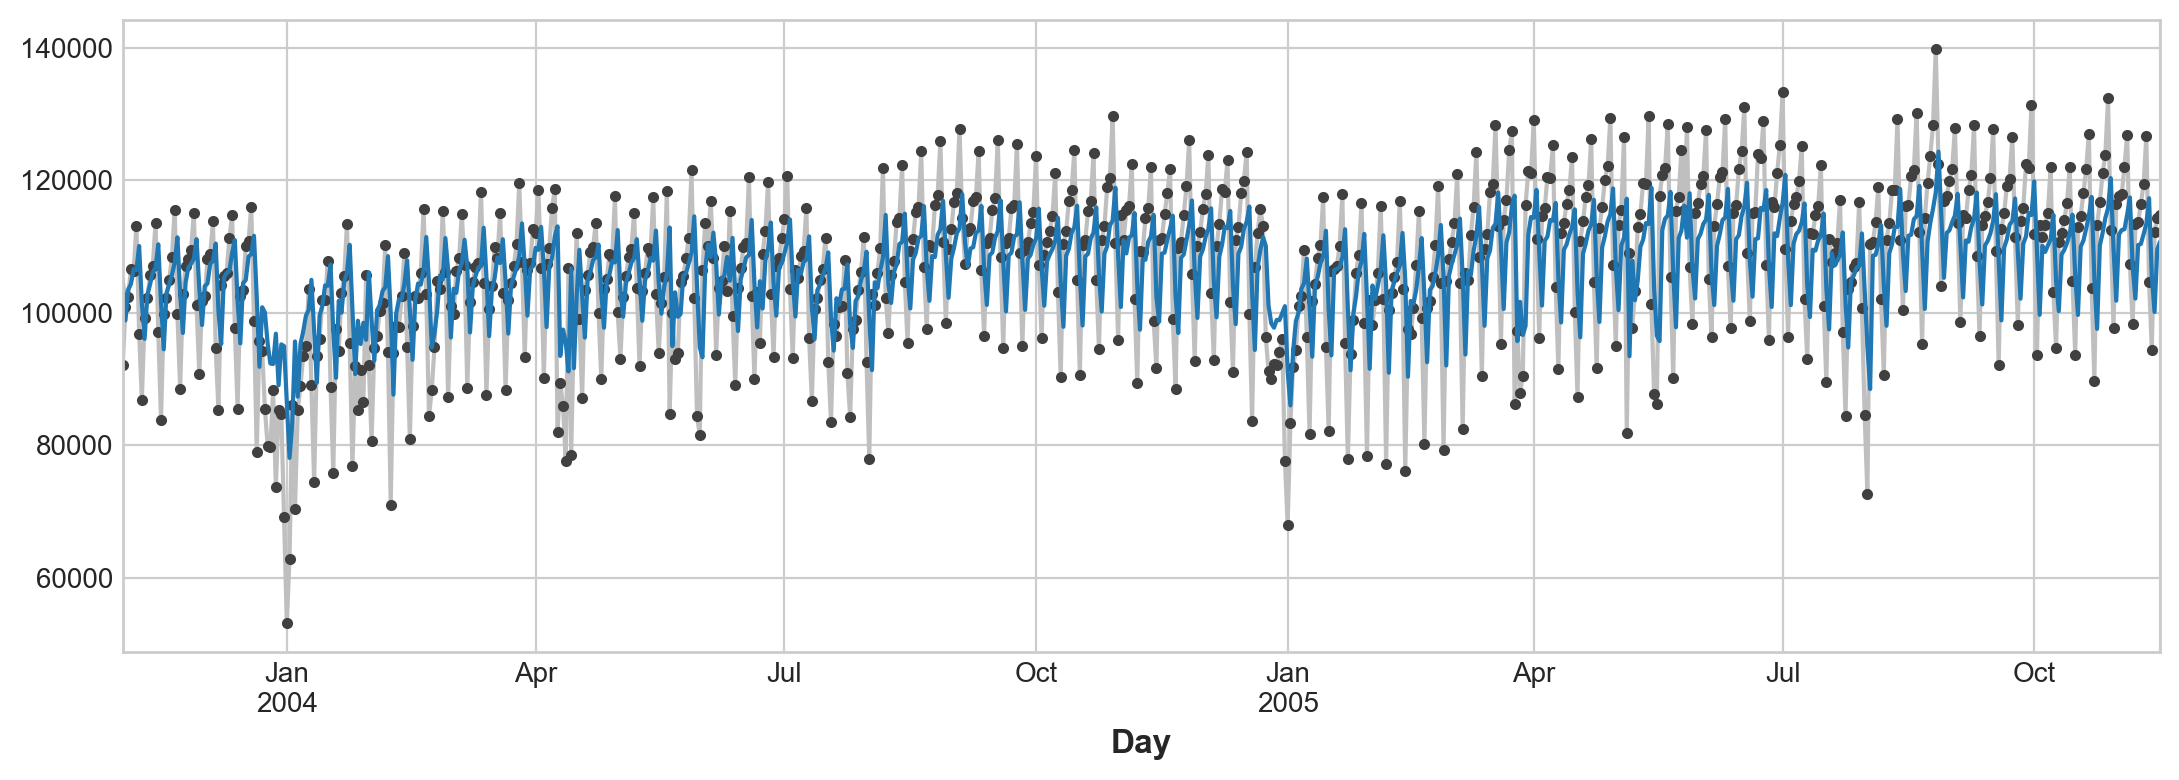

In [25]:
ax = y.plot(**plot_params)
ax=y_pred.plot()